In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.index=df['Seat No.']
df.drop('Seat No.',inplace=True,axis=1)
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
CS-97002,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
print("The rows in the dataset =",df.shape[0])
print("There are",df.shape[1],"columns in the datset.")
print("The shape of the dataset is =",df.shape)

The rows in the dataset = 571
There are 42 columns in the datset.
The shape of the dataset is = (571, 42)


In [5]:
#checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-

In [6]:
#separating categorical columns
cat_col=df.iloc[:,0:-1]
cat_col

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
CS-97002,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
CS-97568,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
CS-97569,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-


# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
CS-97002,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
CS-97003,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
CS-97004,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
CS-97005,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


# Visualization

# Uni-variate Analysis

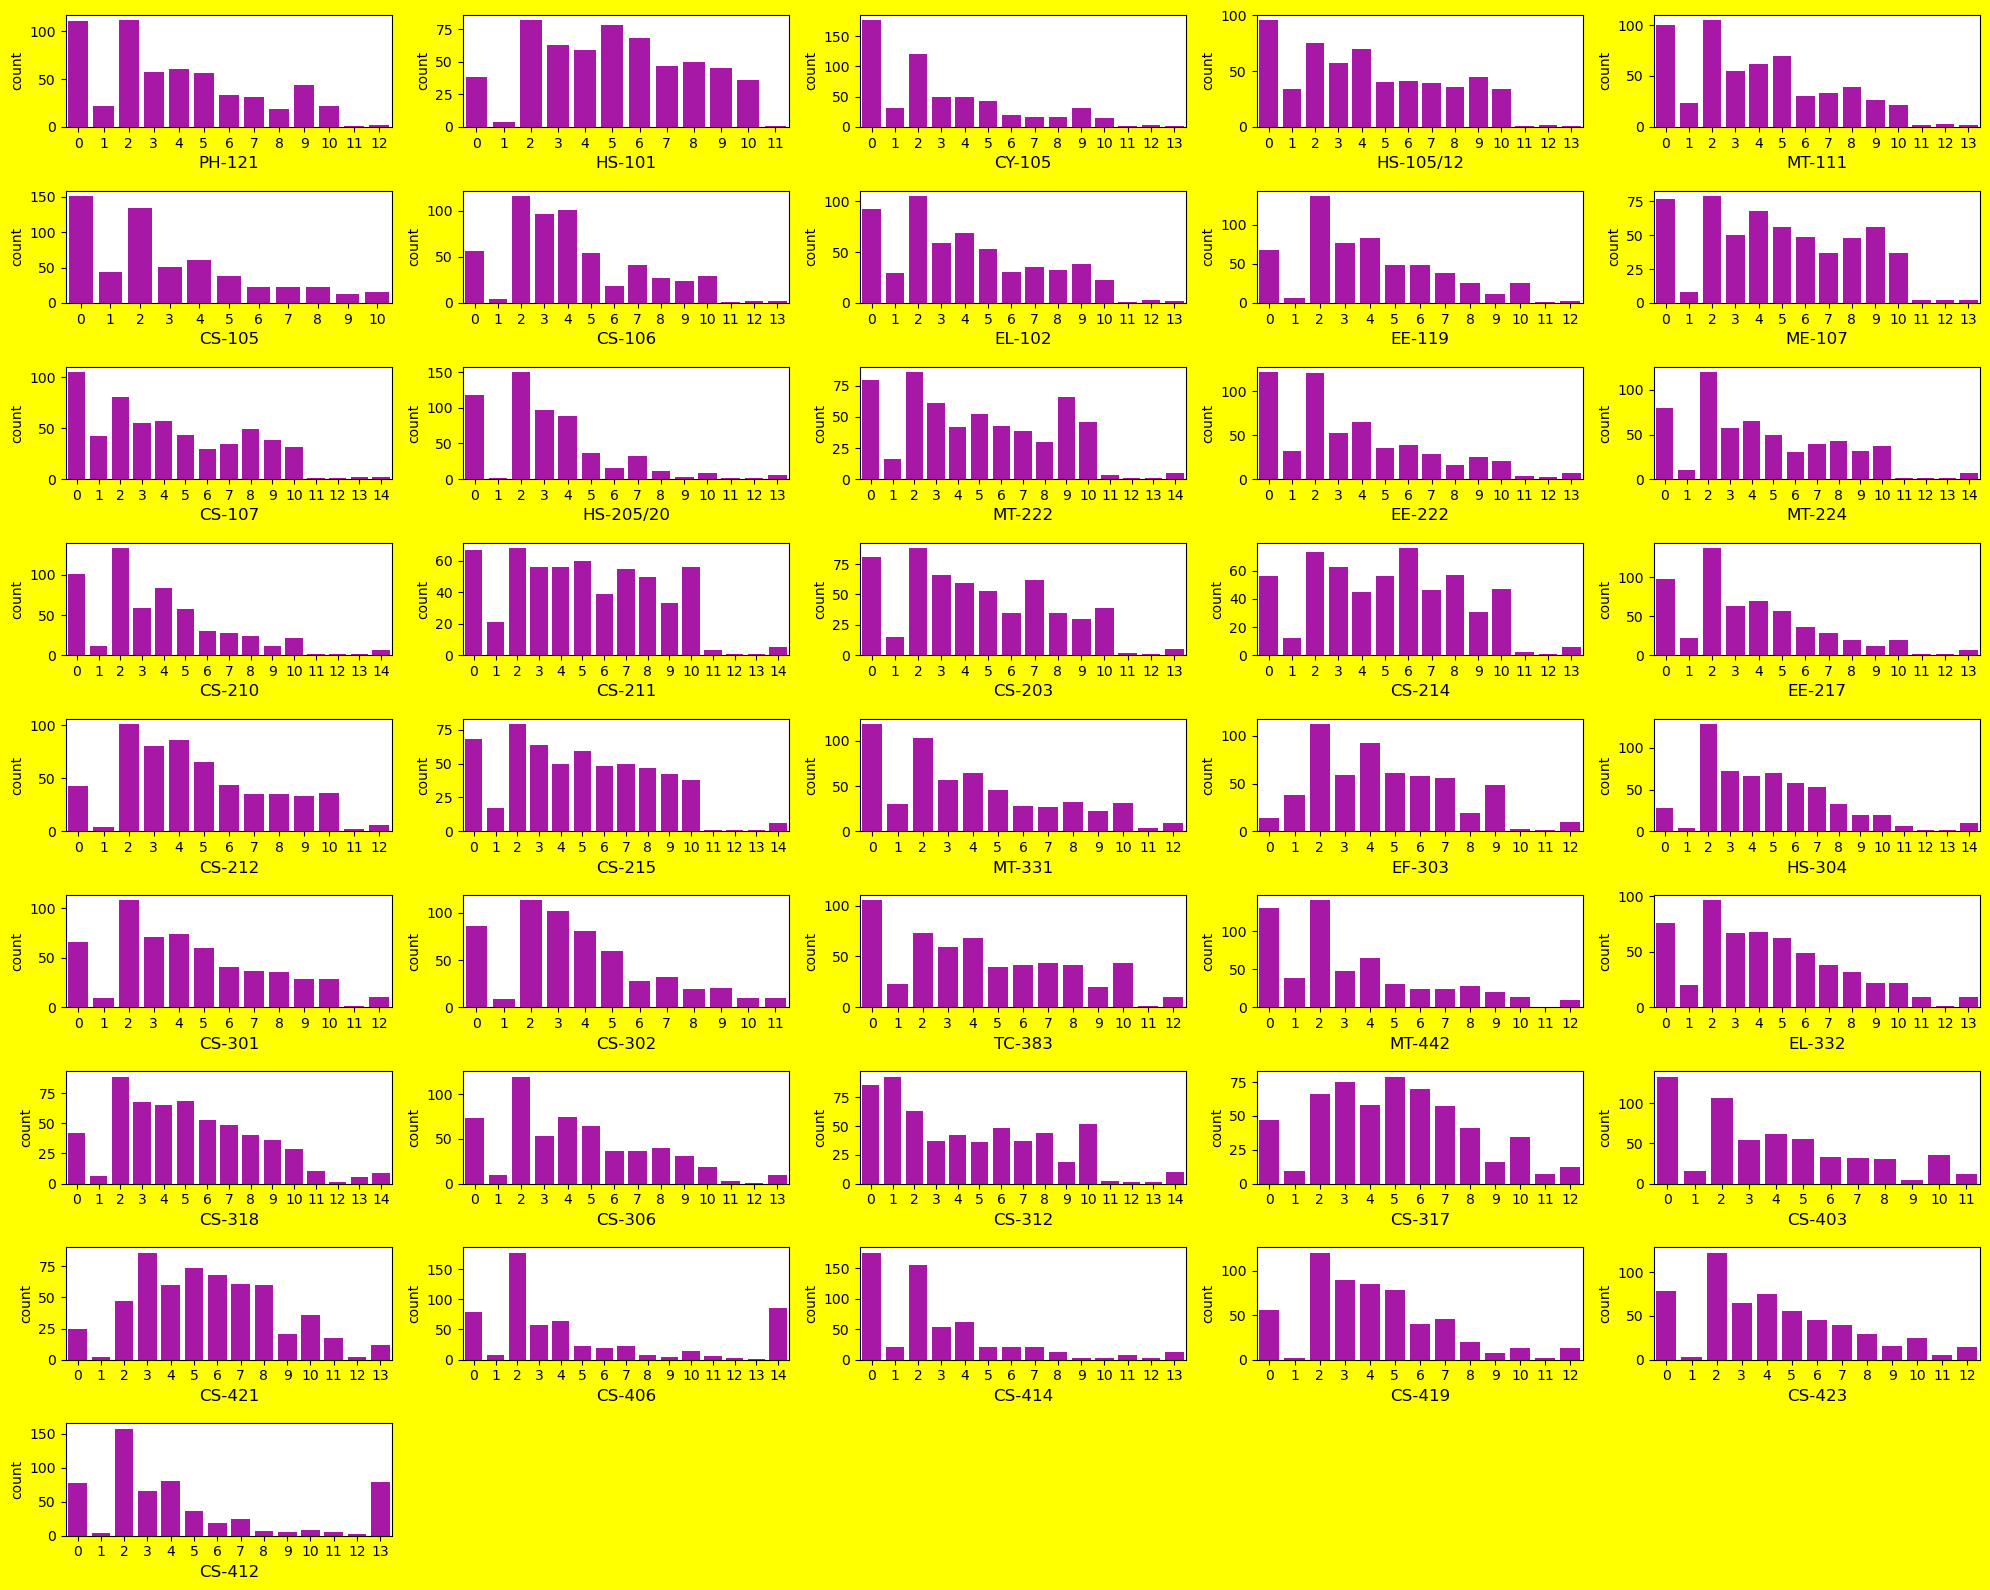

In [9]:
plt.figure (figsize=(20,16),facecolor='yellow')
p=1
for i in cat_col:
    if p<=41:
        ax=plt.subplot(9,5,p)
        sns.countplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        p+=1
    plt.tight_layout()

# Bi-Variate Analysis

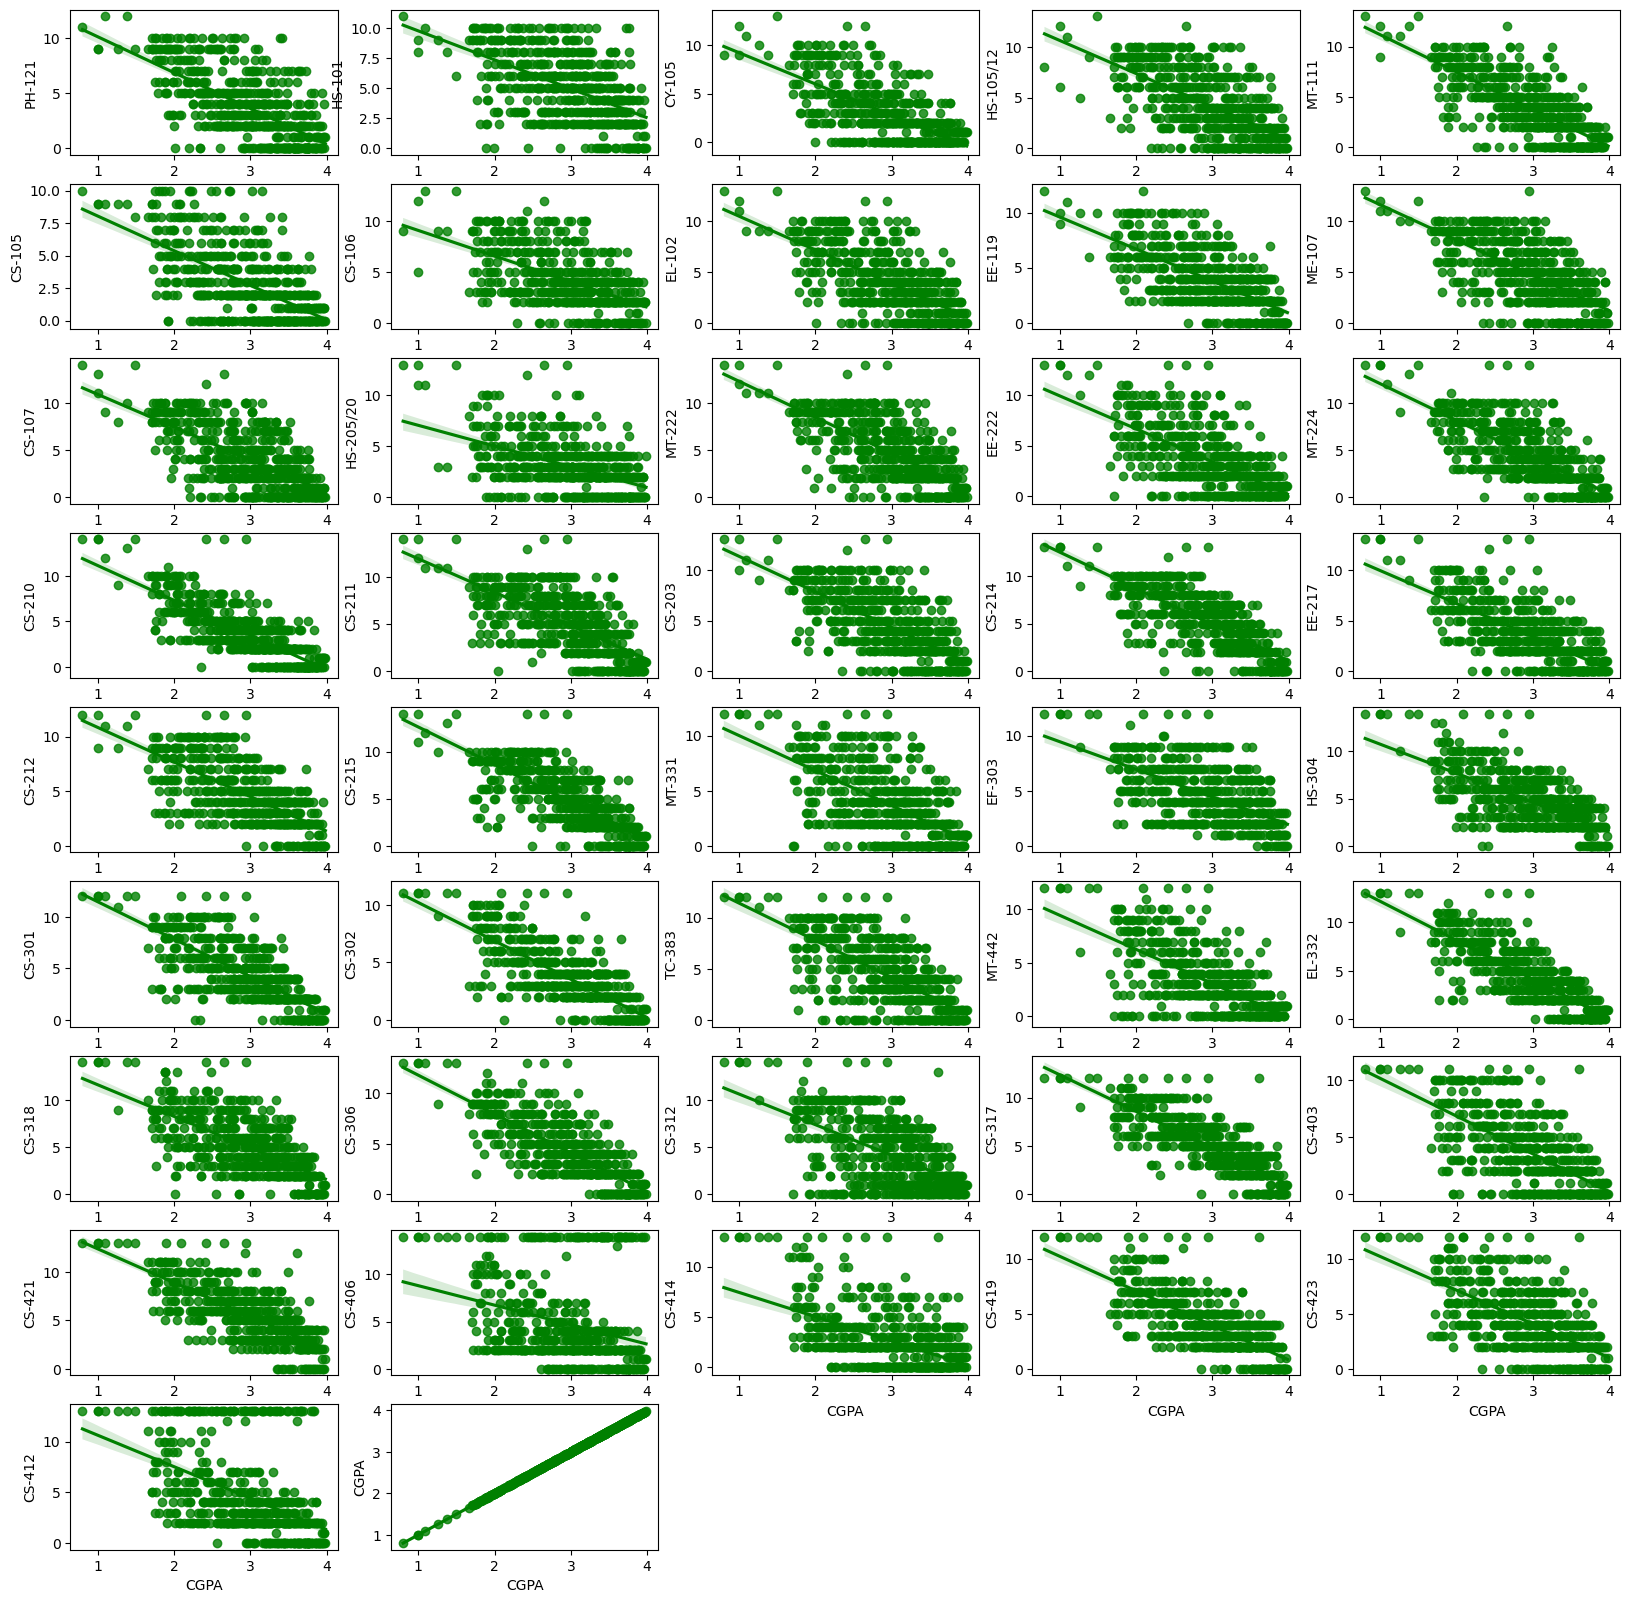

In [12]:
plt.figure(figsize=(20,20))
p=1
for i in df:
    if p<=42:
        plt.subplot(9,5,p)
        sns.regplot(x='CGPA',y=i,data=df,color='green')
        plt.xlabel("CGPA")
        plt.ylabel(i)
    p+=1
plt.show()

# Outliers Detection

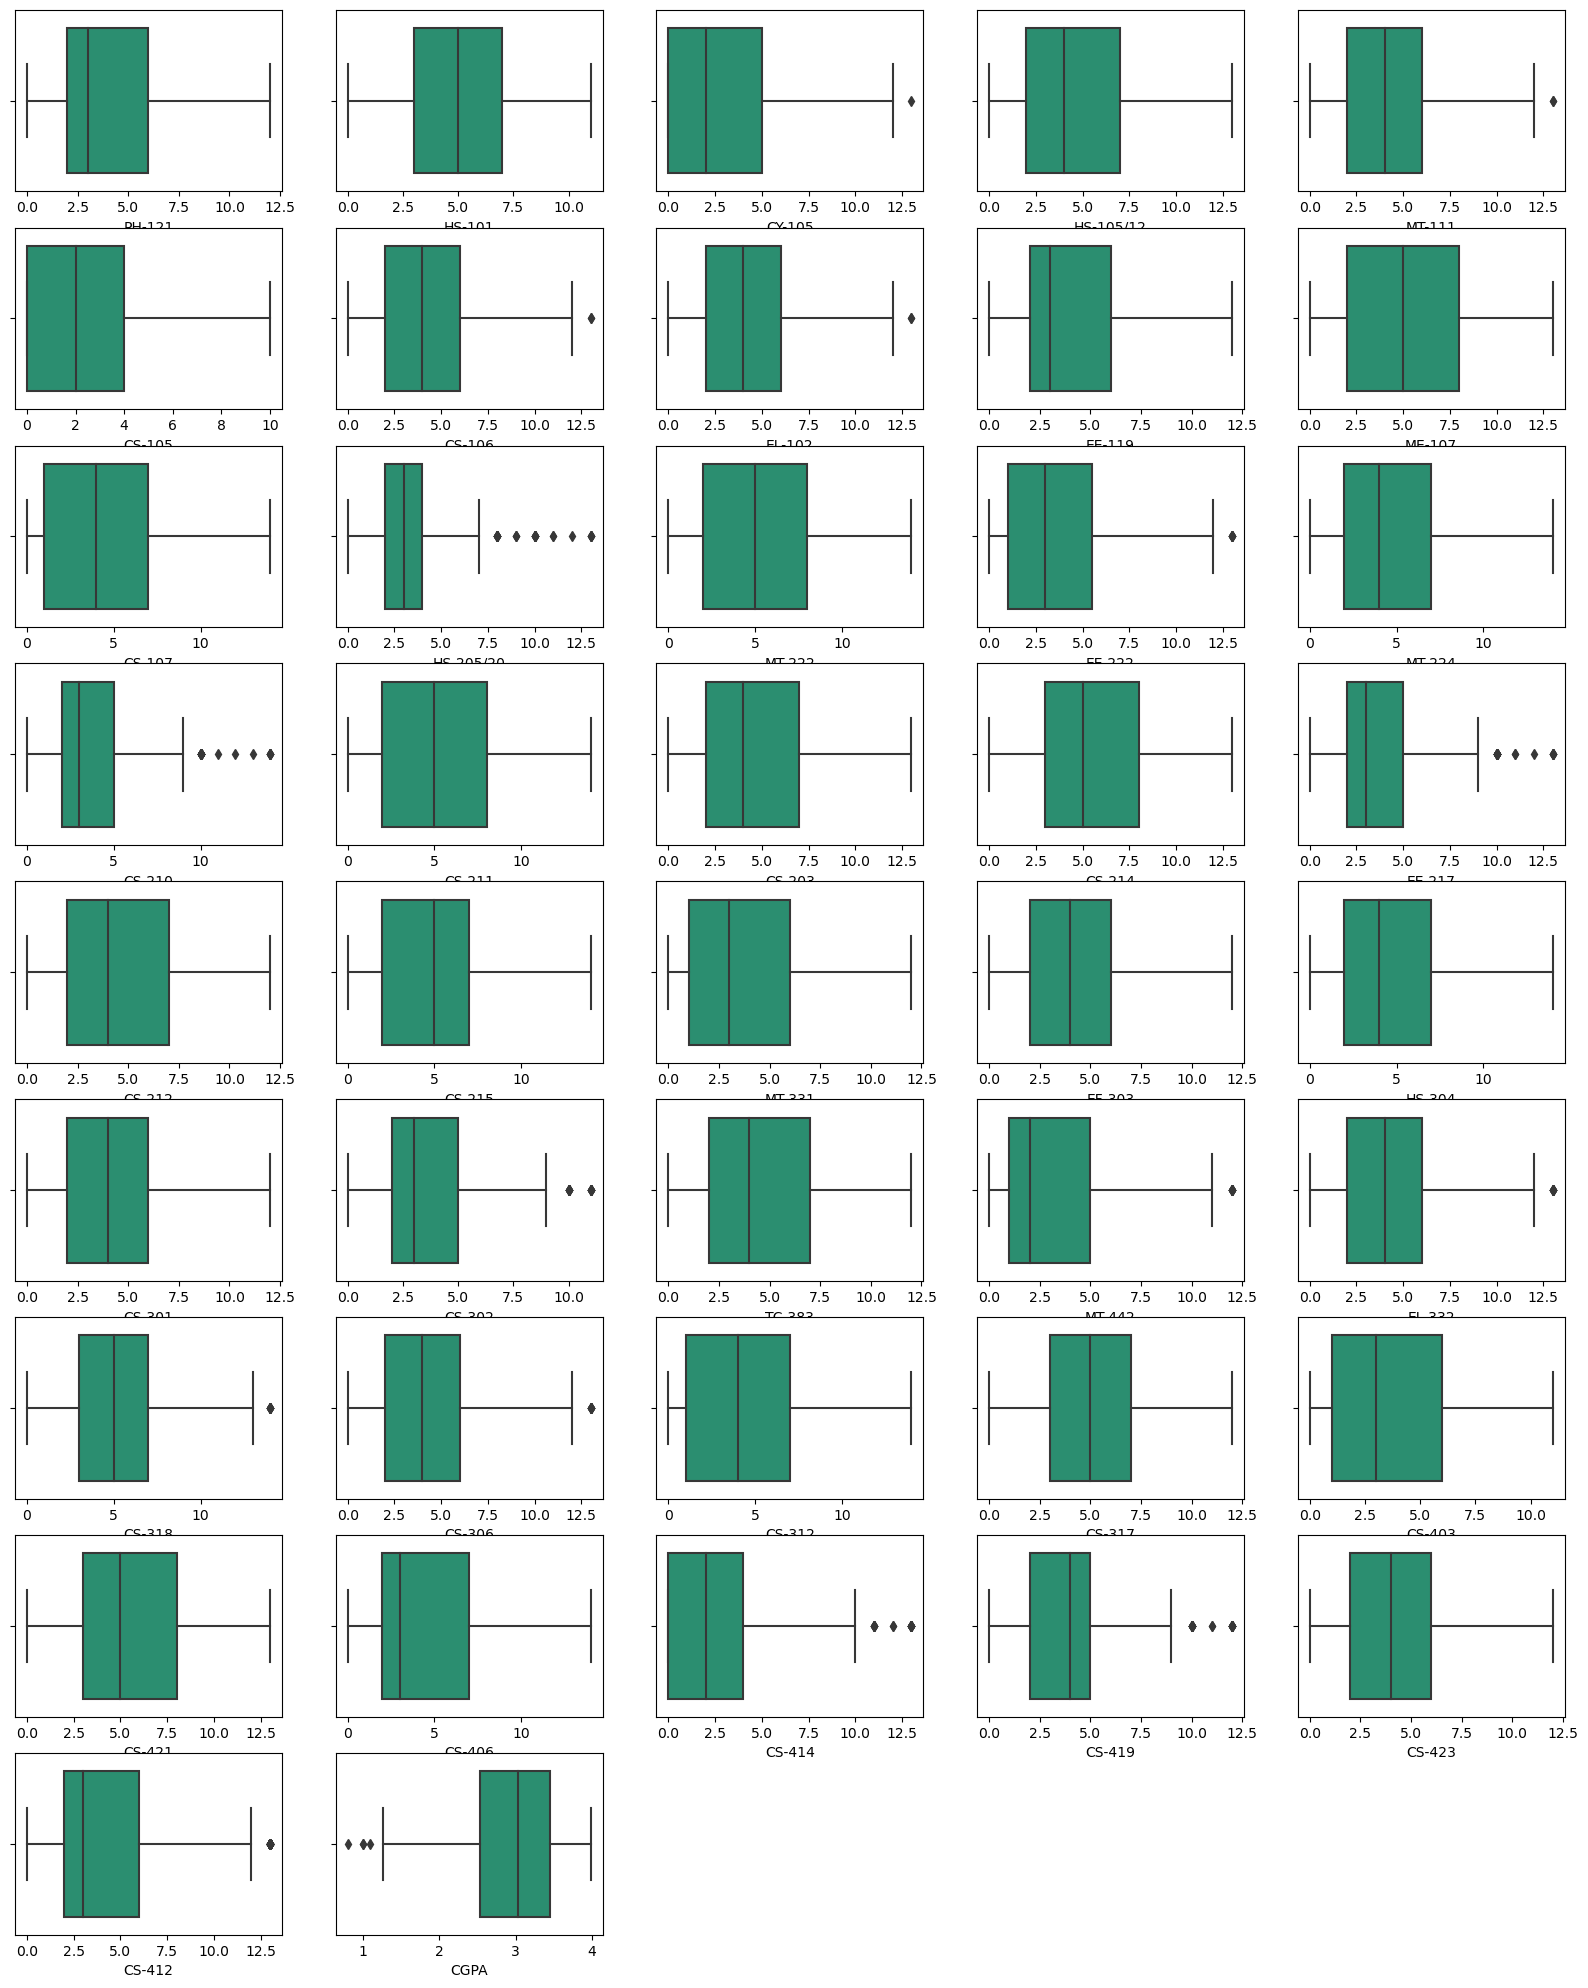

In [13]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=42:
        plt.subplot(9,5,p)
        sns.boxplot(df[i],palette="Dark2")
        plt.xlabel(i)
    p+=1
plt.show()

As we can see there are certain outliers present in the dataset. But all the columns having outliers are categorical columns and CGPA is the target variable, so there is no need of removing outliers and we can proceed with this dataset.

# Checking Skewness

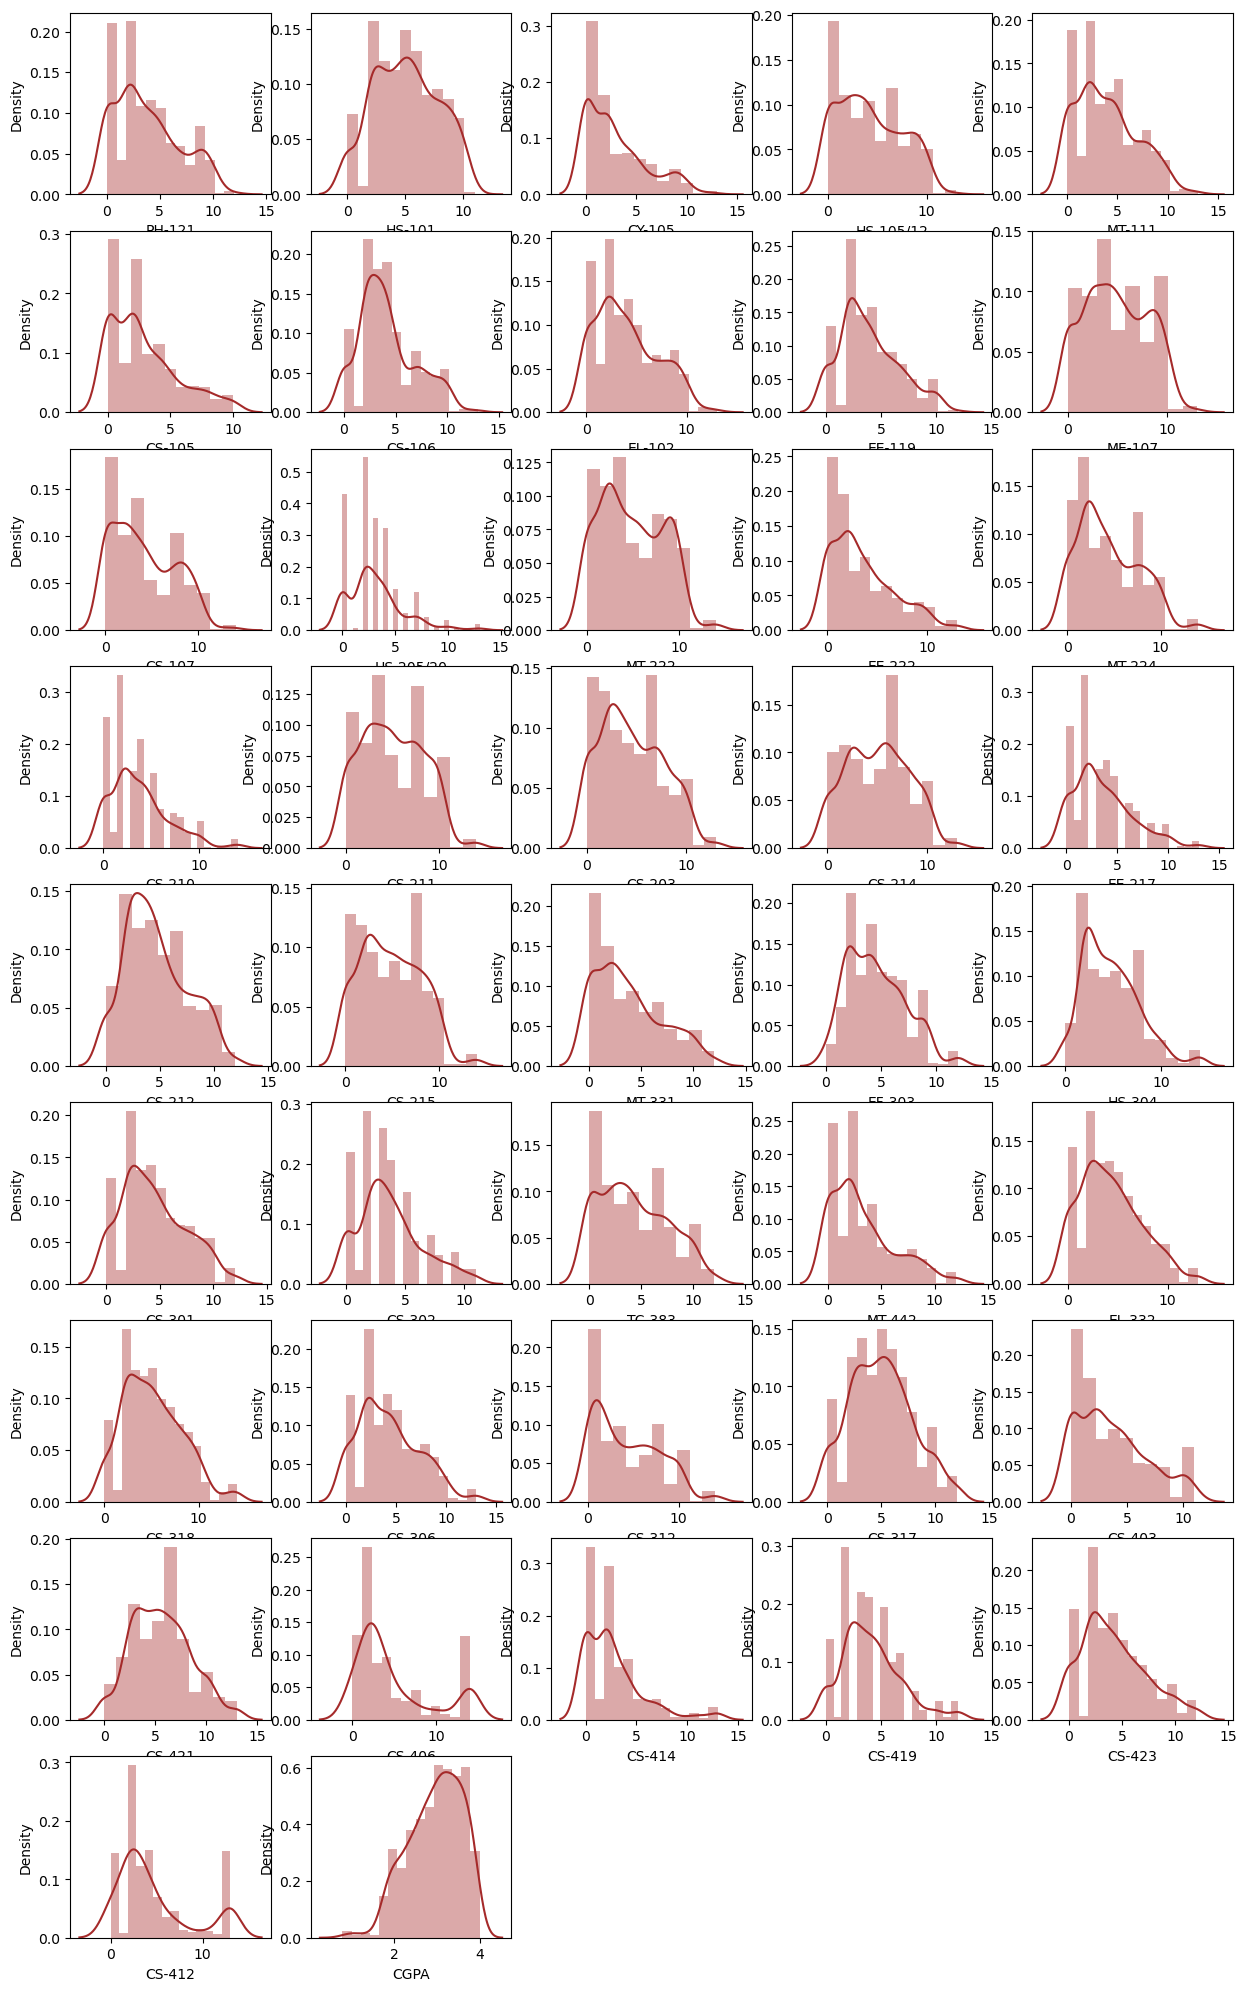

In [19]:
plt.figure (figsize=(15,25))
plt.no=1
for i in df:
    if plt.no<=42:
        plt.subplot(9,5,plt.no)
        sns.distplot(df[i],color='brown')
        plt.xlabel(i,fontsize=10)
    plt.no+=1
plt.show()

Here we can see there is skewness present in certain columns including the target variable(CGPA), but all these are categorical columns and we do not have to remove skewness from categorical and target column, so we can proceed with the present dataset.

# Correlation

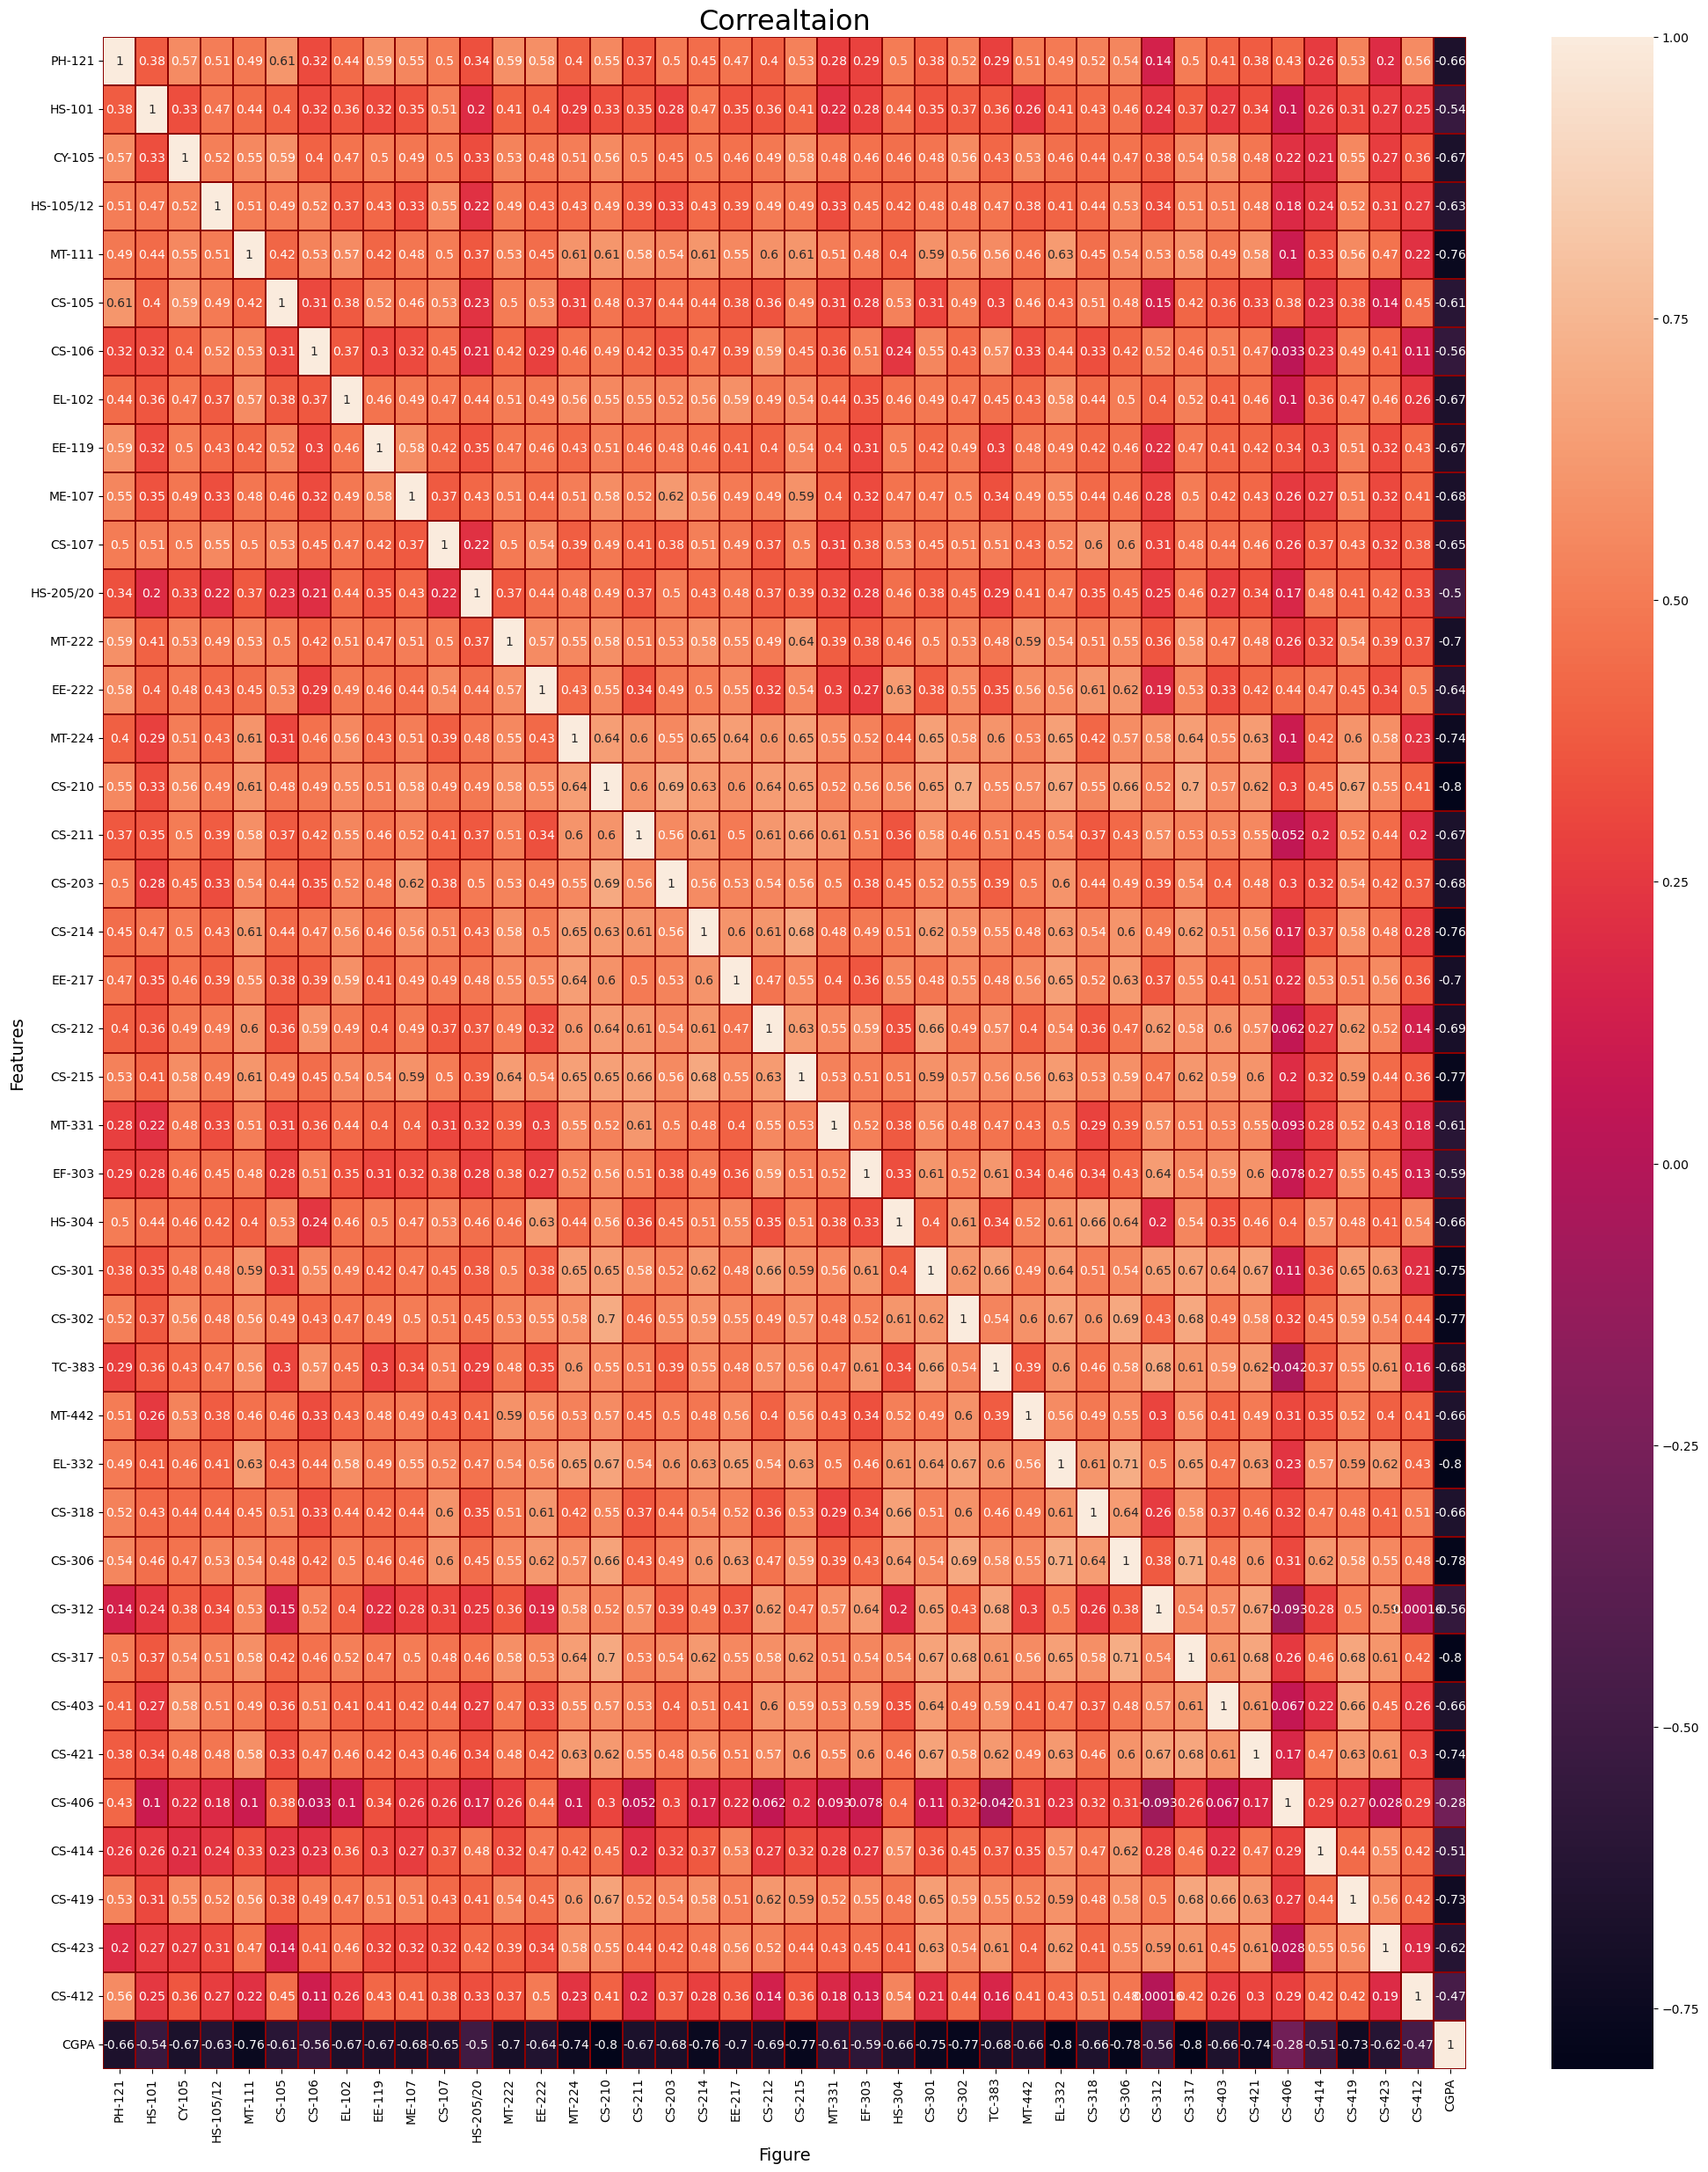

In [22]:
cor=df.corr()
plt.figure(figsize=(25,30))
sns.heatmap(cor,annot=True,linewidth=0.2,linecolor='darkred')
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Features",fontsize=14)
plt.title("Correaltaion",fontsize=23)
plt.show()

In [23]:
cor.CGPA.sort_values()

EL-332      -0.803475
CS-317      -0.800771
CS-210      -0.798841
CS-306      -0.783624
CS-302      -0.770868
CS-215      -0.768707
CS-214      -0.758407
MT-111      -0.756109
CS-301      -0.747775
MT-224      -0.743577
CS-421      -0.742041
CS-419      -0.732899
EE-217      -0.703131
MT-222      -0.695418
CS-212      -0.686163
CS-203      -0.682817
TC-383      -0.682447
ME-107      -0.677342
CY-105      -0.670190
CS-211      -0.669814
EL-102      -0.669536
EE-119      -0.668787
PH-121      -0.663135
CS-318      -0.660106
CS-403      -0.657128
HS-304      -0.656729
MT-442      -0.656557
CS-107      -0.650531
EE-222      -0.644384
HS-105/12   -0.627644
CS-423      -0.624558
CS-105      -0.613169
MT-331      -0.610787
EF-303      -0.589066
CS-106      -0.563178
CS-312      -0.562341
HS-101      -0.537170
CS-414      -0.512836
HS-205/20   -0.500668
CS-412      -0.470128
CS-406      -0.280626
CGPA         1.000000
Name: CGPA, dtype: float64

# Separating feature and target Variable

In [24]:
#Features
x=df.iloc[:,0:-1]
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
CS-97002,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
CS-97003,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
CS-97004,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
CS-97005,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0


In [25]:
#Target
y=df.iloc[:,-1]
y.head()

Seat No.
CS-97001    2.205
CS-97002    2.008
CS-97003    3.608
CS-97004    1.906
CS-97005    3.448
Name: CGPA, dtype: float64

# Checking Multi-Collinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,7.912531,PH-121
1,7.198128,HS-101
2,5.108505,CY-105
3,6.407255,HS-105/12
4,7.329996,MT-111
5,5.176496,CS-105
6,6.446646,CS-106
7,5.879045,EL-102
8,6.720100,EE-119
9,7.860758,ME-107


There is multicolloneraity present, so lets remove them to proceed further.

In [29]:
coll=df[['CS-214','CS-419','CS-421','CS-317','CS-306','EL-332','CS-212','CS-215','HS-304']]
x.drop(coll,axis=1,inplace=True)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-302,TC-383,MT-442,CS-318,CS-312,CS-403,CS-406,CS-414,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5,10,8,6,8,10,9,8,5,8,...,6,7,4,8,8,8,2,0,3,2
CS-97002,0,9,10,9,5,6,9,0,10,9,...,10,8,8,2,10,6,2,5,6,3
CS-97003,0,3,0,5,4,0,5,4,2,2,...,2,3,0,2,3,0,0,0,2,0
CS-97004,9,7,10,9,9,2,10,8,9,7,...,5,10,8,4,10,10,5,3,7,7
CS-97005,2,2,2,4,0,0,2,4,0,2,...,2,7,2,5,5,4,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,3,0,0,2,1,0,2,2,1,4,...,0,1,1,0,2,0,0,4,3,0
CS-97568,1,0,0,0,0,0,0,2,0,0,...,0,0,1,1,4,0,2,3,6,2
CS-97569,3,0,2,4,0,0,0,0,0,3,...,4,0,4,7,2,0,0,6,2,2


After removing multicollinaerity there are 32 columns left

# Modelling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [33]:
#finding the best random_state
max_acc=0
max_RS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    score=r2_score(y_test,pred)
    if score>max_acc:
        max_acc=score
        max_RS=i
print("The r2_score at random state",max_RS,"is",max_acc)

The r2_score at random state 600 is 0.8761352324160719


In [35]:
#creating training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=max_RS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 32)
(172, 32)
(399,)
(172,)


In [37]:
#importing the necessary algos
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Mean Absolute Error =",mean_absolute_error(y_test,lr_pred))
print("Mean squared Error =",mean_squared_error(y_test,lr_pred))
print("R2 Score=",r2_score(y_test,lr_pred))

Mean Absolute Error = 0.10935374808823024
Mean squared Error = 0.033425546669048546
R2 Score= 0.9159840862130118


In [39]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
print("Mean Absolute Error =",mean_absolute_error(y_test,dtr_pred))
print("Mean squared Error =",mean_squared_error(y_test,dtr_pred))
print("R2 Score=",r2_score(y_test,dtr_pred))

Mean Absolute Error = 0.18084883720930237
Mean squared Error = 0.05530453488372092
R2 Score= 0.8609907242258292


In [40]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print("Mean Absolute Error =",mean_absolute_error(y_test,rfr_pred))
print("Mean squared Error =",mean_squared_error(y_test,rfr_pred))
print("R2 Score=",r2_score(y_test,rfr_pred))

Mean Absolute Error = 0.12425151162790689
Mean squared Error = 0.02873038135116278
R2 Score= 0.9277854969264652


In [41]:
sv=SVR()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Mean Absolute Error =",mean_absolute_error(y_test,sv_pred))
print("Mean squared Error =",mean_squared_error(y_test,sv_pred))
print("R2 Score=",r2_score(y_test,sv_pred))

Mean Absolute Error = 0.07795423825362144
Mean squared Error = 0.012879017489564597
R2 Score= 0.9676282804353855


In [43]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)
print("Mean Absolute Error =",mean_absolute_error(y_test,knr_pred))
print("Mean squared Error =",mean_squared_error(y_test,knr_pred))
print("R2 Score=",r2_score(y_test,knr_pred))

Mean Absolute Error = 0.11039651162790697
Mean squared Error = 0.024585856511627903
R2 Score= 0.9382028595818627


# Cross_Validation

In [44]:
from sklearn.model_selection import cross_val_score

In [48]:
#finding the best k_fold
for i in range(2,20):
    cvscore=cross_val_score(dtr,x,y,cv=i)
    print('At K-Fold',i)
    print('CV Score of model is',cvscore.mean())
    print('std is',cvscore.std())
    print('Testing Accuracy Score for model is',r2_score(y_test,dtr_pred))
    print('\n')

At K-Fold 2
CV Score of model is 0.5886335743428943
std is 0.12584521441451618
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 3
CV Score of model is 0.7158567861960289
std is 0.07115259817301946
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 4
CV Score of model is 0.6341454026543272
std is 0.08588905342651038
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 5
CV Score of model is 0.7424144400474999
std is 0.08250299141648275
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 6
CV Score of model is 0.7627014831918717
std is 0.059306182483000666
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 7
CV Score of model is 0.7523105161786126
std is 0.059691415804601106
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 8
CV Score of model is 0.7827597945857232
std is 0.05177087179888542
Testing Accuracy Score for model is 0.8609907242258292


At K-Fold 9
CV Score of model is 0.76632880112

Here we can see at k_fold 8 the cv score is the highest, so let's consider this value for further prediction.

In [49]:
dtr_score=cross_val_score(dtr,x,y,cv=8)
print(dtr_score)
print(dtr_score.mean())
print("Difference between cv_score and r2_score is",(r2_score(y_test,dtr_pred))-dtr_score.mean())

[0.73121691 0.81298922 0.79134451 0.79121405 0.84372312 0.6680177
 0.69989579 0.79020826]
0.7660761955202441
Difference between cv_score and r2_score is 0.09491452870558514


In [50]:
sv_score=cross_val_score(sv,x,y,cv=8)
print(sv_score)
print(sv_score.mean())
print("Difference between cv_score and r2_score is",(r2_score(y_test,sv_pred))-sv_score.mean())

[0.9721753  0.94776398 0.9777513  0.97494209 0.95453031 0.95668317
 0.96880188 0.93724485]
0.9612366106121726
Difference between cv_score and r2_score is 0.006391669823212931


In [51]:
rfr_score=cross_val_score(rfr,x,y,cv=8)
print(rfr_score)
print(rfr_score.mean())
print("Difference between cv_score and r2_score is",(r2_score(y_test,rfr_pred))-rfr_score.mean())

[0.93697779 0.86802514 0.94622031 0.96753934 0.90455538 0.89613695
 0.92313499 0.90683449]
0.9186780510840571
Difference between cv_score and r2_score is 0.00910744584240808


Here we can see model SV is having the least difference so lets continue with this model.

In [62]:
Final_model=sv
Final_model

SVR()

# Saving the best model

In [63]:
import joblib

In [64]:
file=joblib.dump(Final_model,"Student Grades.pkl")
file

['Student Grades.pkl']

In [67]:
#loading the model
model=joblib.load("Student Grades.pkl")
model.fit(x,y)
prediction=model.predict(x_test)
prediction

array([3.26431335, 3.38736448, 3.35155825, 2.897145  , 2.79479619,
       2.83323633, 3.25589621, 1.84904021, 3.80355975, 2.84771676,
       2.44441058, 3.61063119, 2.22944141, 2.01287742, 2.71690213,
       2.00887492, 3.31933622, 3.89202064, 3.41355245, 3.28684335,
       2.92755155, 3.68231178, 3.19496347, 2.83869286, 3.30189641,
       2.85024091, 3.0716542 , 2.3938292 , 2.0573958 , 2.62913633,
       2.35273997, 3.30420872, 3.79416355, 2.8938641 , 3.40507779,
       2.42765991, 1.39313677, 1.81391077, 2.04196604, 3.80855372,
       2.8216816 , 3.77614698, 3.28939574, 2.74034218, 2.55942064,
       3.00695083, 2.10749274, 3.14857243, 3.81898545, 2.25175226,
       3.67001591, 1.9354547 , 3.22566373, 3.26780984, 2.5496423 ,
       3.01572341, 3.06686784, 3.05581978, 3.10280382, 3.87853496,
       2.38815513, 2.78411696, 2.96910731, 2.43113283, 3.17075604,
       2.3127854 , 3.63643528, 3.34262375, 2.72163388, 1.99048764,
       2.65280283, 2.78702814, 2.95488227, 3.19793469, 3.39421

In [68]:
actual=np.array(y_test)
ds=pd.DataFrame()
ds['Predicted Value']=prediction
ds['Actual Value']=actual
ds

,Predicted Value,Actual Value
0,3.264313,3.227
1,3.387364,3.339
2,3.351558,3.452
3,2.897145,2.805
4,2.794796,2.895
...,...,...
167,3.625793,3.571
168,3.390700,3.491
169,1.177962,1.092
170,3.686241,3.586
